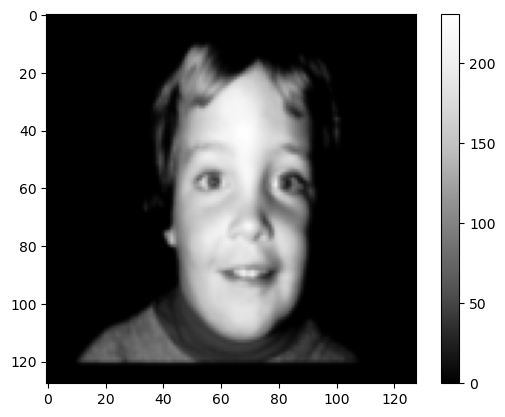

In [8]:
import os
# 图像文件夹路径
images_folder_path = r'E:\face\rawdata'

# 存储图像数据的列表
image_data = []

# 存储标签数据的列表
labels_data = []

# 读取标签文件并创建一个字典来映射图像ID和标签
labels_dict = {}
with open(r'E:\face\clean_sex_label.txt', 'r') as file:
    for line in file:
        if "(_missing descriptor)" not in line:
            parts = line.strip().split()
            image_id = parts[0]
            label_info = " ".join(parts[1:])
            labels_dict[image_id] = label_info

# 遍历图像文件夹中的所有文件
for image_filename in os.listdir(images_folder_path):
    image_id = os.path.splitext(image_filename)[0]  # 去掉文件扩展名
    if image_id in labels_dict:
        image_path = os.path.join(images_folder_path, image_filename)

        # 获取文件大小
        file_size = os.path.getsize(image_path)

        # 检查文件大小是否与128x128图像匹配
        if file_size == 128 * 128:
            # 读取图像文件（假设图像是单通道的灰度图像）
            with open(image_path, 'rb') as f:
                image = np.fromfile(f, dtype=np.uint8).reshape(128, 128)
            
            # 将图像添加到图像数据列表
            image_data.append(image)
            
            # 获取对应的标签
            label = labels_dict[image_id]
            labels_data.append(label)

# 将图像数据和标签数据转换为numpy数组
X = np.array(image_data)
y = np.array(labels_data)

# 使用matplotlib显示图像
if X.size > 0:
    plt.imshow(X[0], cmap=cm.Greys_r)  # 使用灰度颜色图
    plt.colorbar()  # 显示颜色条
    plt.show()

In [12]:
# 归一化图像数据
X = X.astype('float32') / 255.0
from sklearn.decomposition import PCA

# 假设X是原始图像数据集
n_samples, height, width = X.shape
X_flattened = X.reshape((n_samples, height * width))  # 将图像数据展平

# 创建PCA对象，保留95%的方差
pca = PCA(n_components=0.95)
pca.fit(X_flattened)  # 拟合数据

# 应用PCA转换
X_pca = pca.transform(X_flattened)  # 应用PCA转换

# 查看降维后的数据形状
print(X_pca.shape)  # 输出降维后的数据形状

(3991, 177)


In [13]:
from sklearn.model_selection import train_test_split

# 假设X_pca是降维后的特征，y是对应的标签
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 打印划分后的数据集大小
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (3192, 177)
Test set size: (799, 177)


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# 决策树分类器
clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# 测试模型
y_pred = clf.predict(X_test)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)


Accuracy: 0.7221526908635795
               precision    recall  f1-score   support

(_sex female)       0.64      0.64      0.64       312
  (_sex male)       0.77      0.77      0.77       487

     accuracy                           0.72       799
    macro avg       0.71      0.71      0.71       799
 weighted avg       0.72      0.72      0.72       799



In [25]:
from sklearn.tree import DecisionTreeClassifier  # 替换为决策树的导入语句

# 假设X_pca是降维后的特征，y是对应的标签（假设y是一维数组）
# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 提取性别标签，假设性别是第一个元素
# 由于y是一维数组，我们直接使用索引来访问
y_train_sex = y_train  # 如果性别标签是y的第一个元素，并且y只包含性别标签
y_test_sex = y_test    # 同上

# 创建决策树分类器实例
clf = DecisionTreeClassifier(max_depth=10, random_state=42)

# 在训练集上训练模型
clf.fit(X_train, y_train_sex)

# 在测试集上进行预测
y_pred_sex = clf.predict(X_test)

# 评估性别标签的准确率
accuracy_sex = accuracy_score(y_test_sex, y_pred_sex)

print(f"Accuracy for gender: {accuracy_sex}")



Accuracy for gender: 0.7221526908635795
